In [39]:
import requests

#API 인증  정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"

#header에  추가될  내용
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

In [40]:
# 네이버 OEPN API에서 고양이와 강아지 이미지를 검색
# keyword : 검색어 (고양이, 강아지)
# display : 검색 결과의 개수
# start : 시작 인덱스
def get_api_result(keyword, display, start):
    # 네이버 이미지 검색 URL
    url = "https://openapi.naver.com/v1/search/image?query=" + keyword \
            + "&display=" + str(display) \
            + "&start=" + str(start) 
    # 네이버 이미지 검색 URL 를 실행하고 검색 결과를 result에 저장
    result=requests.get(url, headers=headers) 
    # 이미지 검색 결과 리턴
    return result.json()

In [41]:
# keyword : 검색어 (고양이, 강아지)
# total_page : 검색할 전체 페이지 (100개씩 10페이지 전체 1000 개의 이미지를 검색)
def call_and_print(keyword, total_page=10):
    # 네이버 이미지 검색 결과에서 이미지를 다운 받을 url을 저장 할 리스트
    link_list=[]
    # 1에서 부터 total_page(10페이지)+1 미만 만큼 반복
    for page in range(1,total_page+1):
        # 한페이지당 100개의 이미지 정보를 검색
        display = 100
        # 페이지의 시작 인덱스 한페이지당 100개씩 검색 하기 때문에 1페이지는 1, 2페이지는 101, 3페이지는 201 ...
        start = ((page-1)*display)+1
        # get_api_result(keyword, display,start) : 네이버 이미지 검색 API를 호출하고 결과를 리턴받아서 json_obj 에 대입
        json_obj = get_api_result(keyword, display, start )
        # 검색 결과에서 json_obj['items'] 에 이미지를 다운 받을 URL이 저장되 있으므로 json_obj["item"]을 link_list에 저장
        for item in json_obj['items']:
            link_list.append(item['link'])
    # 이미지를 다운로드할 url이 저장된 linl_list를 리턴        
    return link_list

In [42]:
keyword = "고양이"
# call_and_print 함수를 호출해서 고양이 이미지를 검색하고 이미지를 다운 받을 URL을 리턴 받음
link1=call_and_print(keyword)
link1

['http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MTVfMTg5/MDAxNjE4NDczMTE1NTMz.BLwOzfhmqzSDxvSzFKSWkHQ4KkEENynw7zlcLXRWyC4g.OhglgZEy0zxNVk857Rc3586pcjtEJnlR9oJLVI5XEwQg.JPEG/IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MTZfODUg/MDAxNjE4NTQyMjA4Nzcz.Fo09j1LTrzqaFs3H4fR28K8vDhWcjnkjeG0J8aPzjJgg.TR4QHBC7iwDt3JC1h8wuN6JPCqTJEKl4JaiCrits_D8g.JPEG/IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MDVfMjE3/MDAxNjE3NTgyNzk0NjI5.uenX5C_yWoHfzagoE9_e934naoZ_lkVaspCnjMRkPukg.Hk4pZ9WSMv6UZ3sLPfN2szFmHkYcZz1l48QE2BOFl40g.JPEG/I83NJ67RXsHAWWga9wDSmnhAfE98.jpg',
 'http://p

In [43]:
keyword = "강아지"
# 네이버 API에서 강아지 이미지를 검색하고 다운로드 받을 URL을 리턴 받음
link2=call_and_print(keyword)
link2

['http://imgnews.naver.net/image/5284/2020/11/09/0000466860_001_20201109102816824.png',
 'http://imgnews.naver.net/image/5511/2021/03/13/0000052698_001_20210313113248904.jpg',
 'http://imgnews.naver.net/image/5511/2021/02/11/0000051115_001_20210211133731882.jpg',
 'http://imgnews.naver.net/image/5511/2021/03/05/0000052228_001_20210305144831029.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MDJfMjEy/MDAxNjE3Mzc0MzUyMTUw.8Dm1WIWQC_4C3_3_43pVOMNR8REjhcu3Lkq6PjinS-Ig.tXsgUXMsho_kvPG_MZKsP1NYwn1Q7BlPZoxl54EfBQYg.JPEG/IzRN-12XDSF5Ub9iXFio8a3ldf_I.jpg',
 'http://imgnews.naver.net/image/5511/2021/02/04/0000050751_001_20210204155455970.jpg',
 'http://post.phinf.naver.net/MjAyMTAyMjJfMjY2/MDAxNjEzOTg0MjIwNTgx.FVtWaV1KqJM9RvDMxMERsGVoGNDoh_6ab-QKKsgK2m0g.xGJ8imRlveaytUaoeGi66QiGB1M2Mm-_FajokoD67x8g.JPEG/IanLAiaQhMqsReGtkdQf89a9Fees.jpg',
 'http://imgnews.naver.net/image/5350/2021/04/22/0000101925_001_20210422140243723.png',
 'http://shop1.phinf.naver.net/20210417_169/1618634206276AbBSt_JPEG/thumb_2s

In [44]:
link1[0]

'http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg'

In [45]:
url= link1[0]

In [46]:
import urllib.request

In [47]:
image_name = url.split("/")[-1]   # url읠 끝자락 부분이 이름
image_name= image_name.split(".")[-1]

 간혹가다 이미지 파일에 물음표가 있는경우에는, image2.find("?") 찾는다.
 리턴할때는 인덱스 넘버로 해준다. 없을때는 -1을 리턴해줌.

if imgae2.find("?") != -1:
    image2= image2.split("?")[0]

In [48]:
picture=urllib.request.urlopen(url).read()
picture

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x03\x9a\x02\xbc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x01\x03\x04\x05\x06\x07\x08\xff\xc4\x00>\x10\x00\x01\x04\x01\x03\x03\x03\x02\x05\x03\x03\x03\x03\x04\x02\x03\x01\x00\x02\x03\x11!\x04\x121\x05AQ\x13"a2q\x06\x14\x81\x91\xa1#B\xb1\x07R\xc1\x153\xd1$b\xf0\x164\xe1\xf1Cr\x92c\x82\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00\x1f\x11\x01\x01\x01\x01\x00\x03\x01\x01\x00\x03\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02\x12!1A\x03\x04"Q\xff\

In [49]:
from PIL import Image
from io import BytesIO

In [50]:
from pymongo import MongoClient
from gridfs import GridFS
from gridfs import GridFS
from gridfs import GridFSBucket

In [51]:
db =MongoClient().python_test
fs =GridFS(db)   # 이미지파일을 저장하려면 변환을 필요로 한다. 
bucket =GridFSBucket(db)    # 버켓에 이미지 내용, 파일명, 이미지 타입 담기

In [52]:
grid_in = bucket.open_upload_stream(
image_name,
metadata= {"ContentType": "image/" + image_name,
          "Type": "Cat"
          }
)

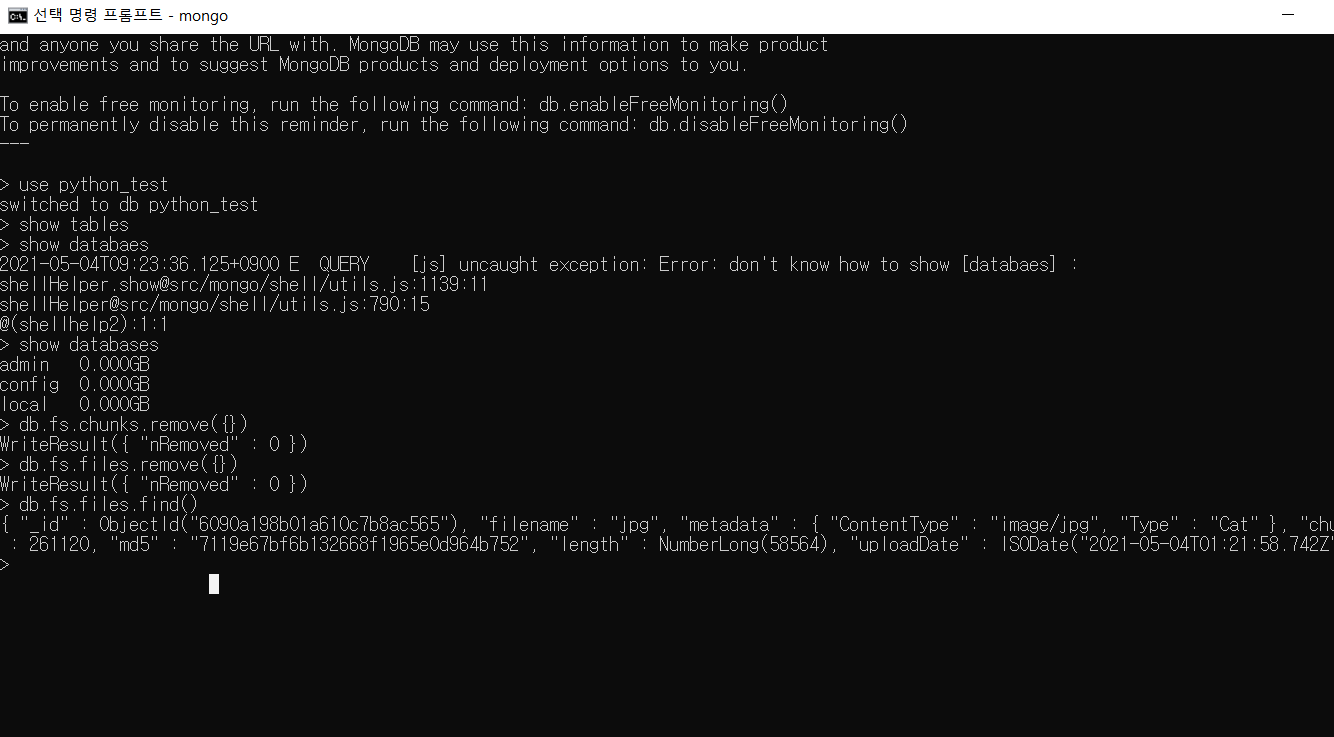

위에서 이미지 파일 및 타입 설정한 것 -> CMD창의 Mongo 부분에서 저장 유무 확인가능

In [53]:
#grid_in.write(picture)

In [54]:
grid_in.close()

# 파일을 불러오는 도중에, 이미지 파일이 없어진 경우, 반복문 중지 예방을 위해 오류 무시하는 방법 추가 필요

오류 방지 방법 중 1개인, Try 를 사용하자

In [55]:
for url in link1:
    try:
        image=urllib.request.urlopen(url).read()
        image_name=url.split("/")[-1]
        
        if image_name.find("?") !=-1:
            image_name =image_name.split("?")[0]
            
        image_type = "jpg"
        
        if image_name.find(".") != -1:
            image_type =image_name.split(".")[-1]
            
        content_type = "image/{}".format(image_type)
        
        # grid_in 을 대표하는 것이 file_name
        grid_in = bucket.open_upload_stream(
        image_name,
        metadata={"ContentType": content_type, "type": "cat"}
        )
        
        grid_in.write(image)
        
        grid_in.close()
        print(image_name)
        print("="*50)
    except:
        print("Error")  # 에러 프린트후, 해당 url 을 find 하여 따로 구분하여 
                       # 정리가 용이하게 하기 

IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
I5moydFuUMwFi3oEOPX959RlIZqY.jpg
IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg
I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg
IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg
mosaakTul0.jpeg
IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg
IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg
0000109645_001_20210414160328325.jpg
Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg
I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg
I1hoQJPcjdBUwaPKW-Mo7DKRTWKQ.jpg
0000050851_001_20210207121759617.jpg
InMPojw89TUVzGSOxu-cLdP4z9YE.jpg
It2EXojHG65IVMKt3AUYXXvI8aCk.jpg
IsCLLxO4nAmF8PZYz7qG1SDs5k6k.jpg
I3zHrwehDjdZoKPssXEZcB82vo8Y.jpg
IBjDo1mQMyU7UqQTWiTuA9O_1ZBw.jpg
INH-dd7aSQJ8LMOJUSoLxN-cd30I.jpg
0000100240_001_20210306160159601.png
thumb_9bi8m4p_20201230205826271445_3.jpg
Irp2bldVrTyexTc7fwpBgKFzDy4A.jpg
Iujjat4A1HJZy5NcUx2n5Bsk3Ipc.jpg
IfswCqGx8aPZHxoKV-oPzCRObhUw.jpg
0003169692_002_20210309175621010.jpg
IG3UiOUDAzruj552JT6yYiYZevX0.jpg
I_Eu7eViXFtbAit7-zl4JBJ2aP4Y.jpg
45781_mainiamge2.jpg
I-RdoFrc51CAKbj

20131218_1387304187_43538200_1_59_20131218032103.jpg
10083_1333277_4802399.jpg
e_s43b045003_ff498484e00073089d906ddf180c1bceae420647.jpg
IPStGa2ubNkJ560iIyxEy8l7wxmM.jpg
0000046589_001_20201116110222712.jpg
sz010620131210152442_I_01_C_1_59_20131210153202.jpg
IMG_0107.png
10635929381309514_34257441.jpg
493353(1)-500282_20284.jpg
O1CN019U71jU2G6w6xkZi1v_925258967.jpg_1200x1200.jpg
42877009.2.jpg
11943126316833329_633698753.jpg
mug_obj_201403120300032819.jpg
I4pKUh84Nz5YtZWrfDNTQamC5qtY.jpg
DSC02684.jpg
mug_obj_141221917436380909.jpg
15406361523496934_2124097099.jpg
d981b44c7ea5a98373d0e32b08ff6231--spring-blossom-beautiful-cats.jpg
1531627538710.jpg
491841_375193_1615_99_20151014075618.jpg
0000026155_001_20200429111451688.jpg
I8iKQLczDD41onU8rWX7k9ymlkk0.jpg
dafbab0648c25862c7ed31e17803eed5--you-dont-say-its-you.jpg
news_1420532789_480230_m_1_99_20150106173005.jpg
20121212_1355278439..jpg_59_20121212112951.jpg
1378451542_59_20130906211202.jpg
1f12144444b8a65505e0fc60ea45aed1--grumpy-cats

IPeALMQVyUcq764SnAUGwMnr_N10.jpg
I-HI0ej46sGLjXTDZODtvZaja16A.jpg
IE001734949_STD_99_20140727152902.jpg
DSC00117.JPG
0000039494_006_20200902164258341.jpg
mug_obj_201402120051432863.jpg
I3hPEWA7B8JB-yK7IWTrHsZ9T04s.jpg
0000756582_001_20201003000039033.png
mug_obj_139789011812529614.jpg
20130411_221159000_59_20130411221516.jpg
0000040969_004_20200915140506231.jpg
0000039494_006_20200902164258341.jpg
125911_1.jpg
25752_52716_2413_0_20120612093603.jpg
132237_1.jpg
I3oZ7TDWtQkRHWZBxhRMcHKwKSvs.jpg
0000036585_001_20200809112446168.jpg
26059143789.20210219193913.jpg
PYH2008082705420001300_P2.jpg
98d4b082eb8dcc10d3e9b9962c3d23ef.jpg
0000002008_004_20201228162141742.jpg
572d3f97b8a6a4ad8ad14616919735f0--british-longhair-british-shorthair.jpg
a0013657_2238319.jpg
0000035567_001_20200731130641181.jpg
0000048734_001_20201225122630355.jpg
0000001462_001_20190521113028991.jpg
0000047289_001_20201130171816690.jpg
0000047771_001_20201208160244486.jpg
15406361523496934_2124097099.jpg
0000045172_001_202

26224980382.20210303193043.jpg
mug_obj_141024737195334286.jpg
0000050690_004_20210203165427443.jpg
I_PSNTgnSJmY-nFCkdKoacbEu4Is.jpg
I6lIUfzjYqtKErdpIRW67khw5qsE.jpg
0000109911_001_20210417160429263.jpg
ITEteugsJXihyGHhK7Iplhm2WOYw.jpg
0000052444_002_20210309135608594.jpg
25552102724.20210109233307.jpg
30000314055_59_20130906211001.jpg
17447700826255039_1452426030.jpg
Ika3mWGMtMsYDAwBO3Vk7zrM7ywA.jpg
0000024351_001_20210108103036586.png
Ih5DrBuEpMpAsK2MDCWiWj-dyznk.jpg
IMJg0Zz8y5As1shGk9wk1liG9ziA.jpg
0000054785_001_20210418115604803.jpg
I_y0r43eNCfVT8zkT0rueO_-jiWs.jpg
18847501690788576_1888287809.JPG
26606130100.20210401222341.jpg
mug_obj_141221917364722158.jpg
IOwskqU2YSmPxAiG_ZQ2RWmavu0s.jpg
bb2fcb380ba3ac2c116df184a5787fb8.jpg
Igv2Q7DAusMIde2a2VYSCrbofSlc.jpg
I6jEpd9ew7dT2wl3m4g1Rm2XhBEQ.jpg
0000034451_001_20210212214536870.jpg
25542508485.20210109012134.jpg
IynRuBL1fFv1CuW79IAUFb_lMN_g.jpg
26820874802819915_23734758.jpg
IEOivxwhSkLVmDQxZd7-Ddp8patw.jpg
26518150198.20210326042829.j

20200825522367_20200825175606709.jpg
I2MvXEJ8YfxVUWahilu_4hSICgZg.jpg
0000043624_001_20201010113149993.jpg
0000048133_002_20201214082447905.jpg
0d4b0dd7d74bf63d69182b5b2140c2c3.jpg
114940_102590_1938_59_20130909124506.jpg
0000029563_001_20200601083814525.jpg
IdhQ5m_MjZ4NczanJwTc608CIk8E.jpg
5f0fc5c7023e0b492ccf9814345e454e--funniest-pictures-funny-animal-pictures.jpg
9774152ab4ac23559b213e36754dbc0d--cat-site-tuxedo-cats.jpg
IlCijXSCRqFIpqVrmGwLIEh5SGZM.jpg
0000037447_001_20200816111849874.jpg
15c2dbe633147e6f2.jpg
0000031717_001_20200622084019811.jpg
mug_obj_138909448893725618.jpg
DSC02831.JPG
I7oSG3kGK5hOPzH-BSpFozYJQK0o.jpg
20120712124906_60f1091c6b3d19edf5baf2a3ae528e9c_0.jpg
IHE0MMDOlXIqouDsFkNOG00IYJlA.jpg
0000045305_001_20201029100935072.jpg
IvoPKKnuLCP-pgkKsns60wykz4o8.jpg
Error
0000036341_001_20200807113846238.jpg
d17fc14cb93cdc3c02e8df4056027ef4--funny-animals-funny-cats.jpg
53e4718254e8e.jpg
1d65a5a7d6e304e125a91aa315674588.jpg
ItPZ6kkE_9HRUqz5zhgumn3asUNw.jpg
9cab58a3d203f4

IFeJBVzTrteN3mujbN3ZBzgtlnxQ.jpg
0000003571_009_20181108230408625.jpg
0000000123_005_20170821095219652.jpg
f7b308d3305a88fb891240f90acc48cf.jpg
20100628_1277718267_70926500_2.jpg
401630628_bPgUDHZm_KakaoTalk_20190102_163835268.jpg
Ikv-nct5GniS1wpDzq441lZIeQu4.jpg
0000000806_004_20180827111006990.jpg
0000021175_001_20200321132237798.jpg
0000001132_006_20190107113749253.jpg
0000001462_002_20180209172400526.jpg
0000011044_001_20200125141025288.jpg
20160602002345_0_99_20160602162107.jpg
0000034828_001_20200726104039670.jpg
0000107710_001_20210329160235961.jpg
4069f25a3c814eda9ef77848de7f0eec.jpg
INm47lK74YIFUPkQ0CkhsF7-uyUo.jpg
h3ekPDZWaf_rjQXahKfUKz3t.jpeg.jpg
25099973544.20201204205926.jpg
mosaJBVJu2.jpeg
IIGQlXCbnltLpfKlZrWdeFhdA9uQ.jpg
31983288863648917_376557109.jpg
20210215134154_1581813_1200_705_20210215140758607.jpg
TB2pcx3a.ifF1JjSspdXXclLpXa_49403508.jpg_1200x1200.jpg
IzjTpudKufqQbSRcb3BXoiV39ves.jpg
IfxFsWXSV4JAtvTc1Gh3Sm_BwIog.jpg
0003089910_003_20210401063311800.jpg
IWB0_6ucOx

5eff4dab8f3f4663c5be8da10294ef4d--fire-fighters-the-fear.jpg
0000034680_001_20200725113037740.jpg
0000036331_001_20200807112045105.jpg
a2a0a63c30e25836151c5b2421877131.jpg
0000036436_001_20200808124647639.jpg
844d0a7b30497b823fc7fbcab5989c81.jpeg
611718110014910378_8_20200815120904420.jpg
8acd1e32a6a713e6ea5bc74b649819b1.jpg
35e1a30791f440a387f40e6f91b6847b--ragdoll-kittens-kitty-cats.jpg
0000006797_001_20191118083201951.png
ICpg8jub71Q7zvSjSqfCBGBHDHQg.jpg
0000039035_001_20200829124456799.jpg
0000035516_001_20200731110641200.jpg
0000004167_003_20190117110957080.png
viewimage.php
0000019177_001_20200308135232198.jpg
mug_obj_140849800776566133.jpg
0000035120_001_20200728140440426.jpg
Error
download.jsp
0000023801_001_20200409100046077.jpg
25810957266.20210131211730.jpg
7uc4b9v_20213514554772485.jpg
0000001261_002_20180115145001847.jpg
IzfXBwjLROjNifG0tTmD6U_Dq8Ok.jpg
601ed796bff957758110a474c71fae7c--maine-coon-kittens-blue-eyes.jpg
Error
14264234516CCDF40E1671
20170314140720-PmlTRHpuvF

I3Yz29xJ0S6c3NWgKks7ivcEZE60.jpg
I9RW6AbR4zdFsh0NPrMgSXSMvCpk.jpg
item26.jpg
0001066485_001_20180829160559966.jpg
20130503123918_294996_396_602_59_20130503005008.JPG
0000096017_002_20201221090059887.png
0002189701_005_20180517101606576.jpg
0000021890_001_20200327111839615.jpg
62f914329822450eed32edc0db656113--funny-kitties-kitty-cats.jpg
0000000916_002_20181015125702729.jpg
IIjicigDe6DzGh6XiOxe3fff2P_E.jpg
e298fc900d1af4dee3e94e794a4eba0b--sphinx-cat-hairless-cats.jpg
IN268JnTfQGDr_AVBlqH-48zHzDs.jpg
thumb_9mj5y8s_2020123145820210534_3.jpg
9da9f9aa4e2d949b2bd616db02efacc8--sleepy-animals-cat-cat.jpg
11845.jpg
6ha4o3d_2021216171218836177.jpg
9c80ace3556d0351ed22b0c976a591d2--cat-cat-kitty-cats.jpg
0000002299_006_20180601173407789.jpg
0000011364_004_20200103143212261.jpg
0000767238_001_20210204140255304.png
0000046596_001_20201116110840272.jpg
20160918181649201804_99_20160918182305.jpg
45c6e9ec0921d5c6f241be8d6b1b63fb--outdoor-cats-exotic-cats.jpg
IFQue9ls7qy-2w4GzZBFe6v1HDWE.jpg
cab9df2

Idk84hWVEoDeA2L21XIHVh0IsMpc.jpg
AKR20210305124000009_03_i_P4_20210305160925413.jpg
12807602457248863_1741421324.PNG
IJJfWmwGLyY4DbIdHWZJ35cN4dhU.jpg
18583696770167255_106981023.jpg
128160_2.jpg
26368427316.20210315175640.jpg
20041567741068409_135851916.jpg
20160577855081641_624903455.jpg
IP_q5t0uhfqupaTJx-r9Dvjst5As.jpg
IJD5uJrUbM4NLz0Vj8nweB6NE4RE.jpg
ISj9nw46m3S7ZWsUXXbBrc7VmOQo.jpg
26529697071.20210326181525.jpg
IitrvDGkDPcV9U4PIkmypUnLGSlQ.jpg
11109_mainiamge3.jpg
18935347259431695_204009600.jpg
IUXuPla84ZMcJa7Zjlz18U407IOI.jpg
0000049425_001_20210112110238865.jpg
20170612172658795_img1.jpg
0000051587_005_20210223100410329.jpg
26434108522.20210320191336.jpg
11837201666164945_1265509545.jpg
19375243449639073_256724419.jpg
16624441428895125_1487508902.jpg
450_450_O1CN01kTUD972EhSUJKYaTu_2201411448776.jpg
0000050156_003_20210125105040726.jpg
0000050791_006_20210205140523504.jpg
I2cyiD9_U5pcT6LAY2typv1smfOM.jpg
25527394426.20210107214935.jpg
16858431257449591_1875767868.jpg
IpCcdJFkHQ

IMG_20110808_190730.jpg
InWD_eFN3p3XPJVAEKr91wxIXdT0.jpg
Error
0000014333_001_20200211110226720.jpg
0000024547_001_20200415133847215.jpg
IFdkwPhjof-aHTvD1ZyHjF3cEju0.jpg
0000017298_004_20180528135300933.jpg
153654685616.jpg
IPJSDf8vpDMPoddw6H9m6fbDrVyM.jpg
175c3c8ce69429e94.jpg
IqrhaxX-sPWOAdEvh6UQZKlwcWCw.jpg
4e7fbf649be0b477aad30c4e9dbf6564
af0245a802484214455a134c9f4ac100--runners-faces.jpg
download.jsp
0000020239_001_20200315165834224.jpg
0000551016_002_20170721111914340.jpg
20585374379060005_1737893836.jpg
IbW35fZNwlGyLLCugN7A8lpoAr74.jpg
0005137061_002_20210130090032855.jpg
IGPOu_pCZPjlz7m_QN3rKxY_dQMw.jpg
download.jsp
332feeb018fdbdfa5408673edc12097c.jpg
3e91a0727b1336f36045e1238eaf2431.jpeg
I3StM3eHhXMo4L4rlWwLF6-PP4fI.jpg
32f900dbb3b53192d01f3aecc8678883--baby-chickens-pet-cats.jpg
IRlatA0gOW0THLL3ge6IkOP1TeXY.jpg
mug_obj_141536307885378955.jpg
IDgRMg82BvCEH8eaptWqApHXEvyg.jpg
29126849529207683_1223861443.jpg
0000016904_001_20200225105427604.jpg
1493340733660.jpg
I7jc5bP7TPQpT

18067712004756786_724627714.jpg
I56WVumxcN5fWMsAJh0daS6UAcKo.jpg
mug_obj_140007965936566153.jpg
0000039195_001_20200830112856555.jpg
IC2KDgmyJippZ3iY2SftiKGoYSYA.jpg
13401898365402242_397065510.jpg
94e133b949ecc7a1e24190b0b3f0676d.jpg
IndgnbQyLz2i7cKpkM9-RU2ExCv0.jpg
It6Zr0o2duyEBiQBFqOLoRFqNolY.jpg
12b0f777425e101c041025c1cef19d90.jpg
IoNB1TxuziqQManUCbJV5S5DMM3s.jpg
5e97e7eed07d929587ec0b888f738748--ginger-kitten-ginger-cats.jpg
I661S6jezsyaM6KmzXP0xP329kH4.jpg
I_aEE6mC8JdXbaz3A1B3pQId7UJ0.jpg
0000028733_001_20200523123807150.jpg
download.jsp
83707bb3cf3516cc298af9062d0e7f77--kucing-do-you.jpg
0000652200_001_20200619153105914.jpg
2112721023_8kj2cT0v_IMG_5168.JPG
7fs2h0x_20201020183913123364.jpg
IWy8iP_1CQJ4Lmpmo3Yv0Vs58Z8U.jpg
0000026392_001_20200501184653000.jpg
PYH2013110303290001300_P2_59_20131103153803.jpg
I7vVC-H_urT_nMZxJnLkqggsVOuY.jpg
0000100294_001_20210308160250631.png
I0UiPRZXUv-xnQ4Ep3EmfonGM-X4.jpg


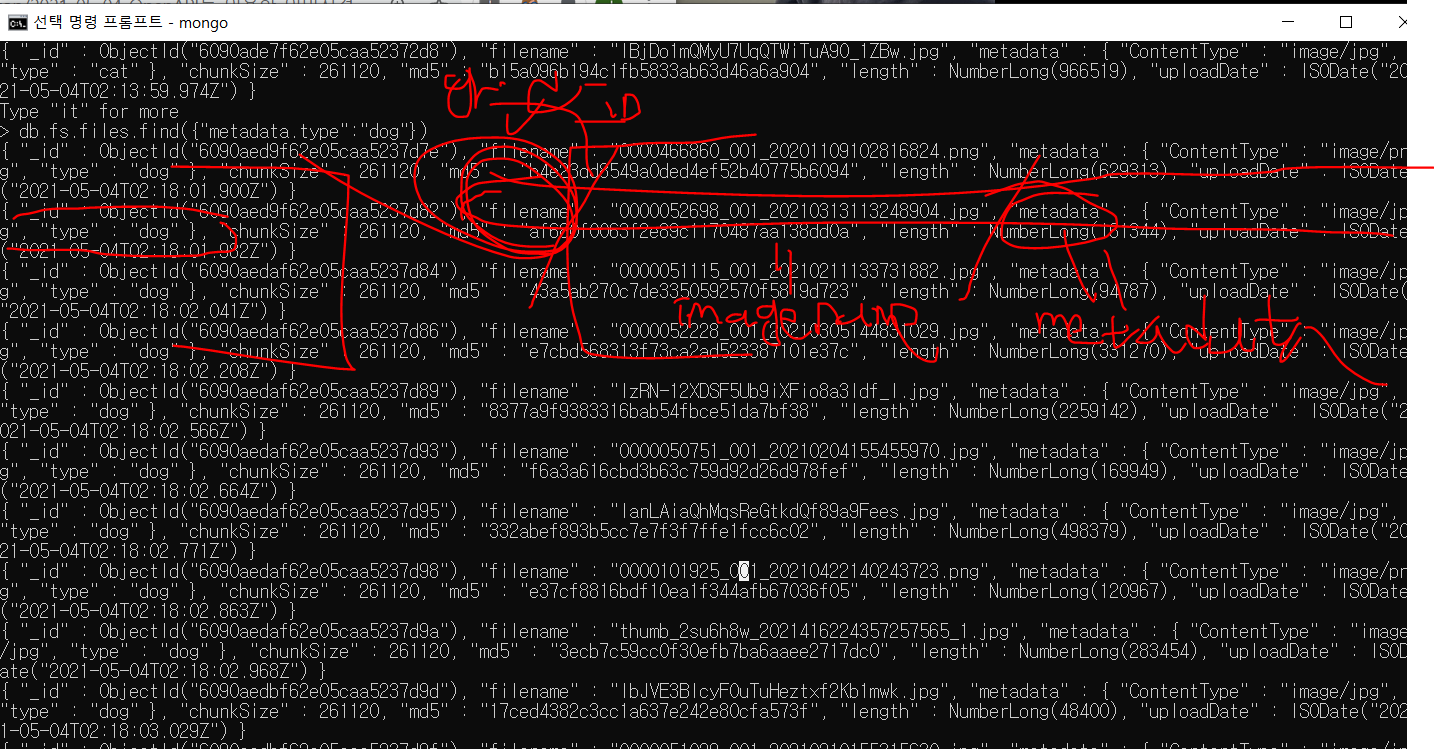

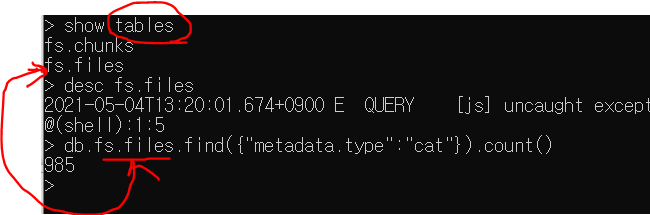

db.fs.files.find({"metadata.ContentType":{$regex:"image"}})    
$regex = 포함하는지 물어보는 

In [56]:
for url in link2:
    try:
        image=urllib.request.urlopen(url).read()
        image_name=url.split("/")[-1]
        
        if image_name.find("?") !=-1:
            image_name =image_name.split("?")[0]
            
        image_type = "jpg"
        
        if image_name.find(".") != -1:
            image_type =image_name.split(".")[-1]
            
        content_type = "image/{}".format(image_type)  #("image/"+ "image_type").strip
        
        grid_in = bucket.open_upload_stream(
        image_name,
        metadata={"ContentType": content_type, "type": "dog"}
        )
        
        grid_in.write(image)
        
        grid_in.close()
        print(image_name)
        print("="*50)
    except:
        print("Error")

0000466860_001_20201109102816824.png
0000052698_001_20210313113248904.jpg
0000051115_001_20210211133731882.jpg
0000052228_001_20210305144831029.jpg
IzRN-12XDSF5Ub9iXFio8a3ldf_I.jpg
0000050751_001_20210204155455970.jpg
IanLAiaQhMqsReGtkdQf89a9Fees.jpg
0000101925_001_20210422140243723.png
thumb_2su6h8w_2021416224357257565_1.jpg
IbJVE3BIcyF0uTuHeztxf2Kb1mwk.jpg
0000051029_001_20210210155315630.jpg
0000050672_001_20210202151831294.jpg
0000054461_001_20210413152428845.jpg
0000052293_001_20210306131025167.jpg
17871716977794956_1284396999.jpg
0000544580_001_20210421110521883.jpg
Iul85MJ8xMPztFcLHQrIMNW8XWXQ.jpg
mosaZhsCK5.jpeg
10574220693008099_619537594.jpeg
0000052978_001_20210317152122754.jpg
0000101349_001_20210406140312422.jpg
202103221802365.jpg
33597_mainiamge2.jpg
no_0.303297929858506341617259934292.jpg
0000050480_001_20210130115335711.jpg
IT2y8kpn7hjXDcLNk5EBWRuLJ1WA.jpg
IeuDlsaPHct0X1eLxrjVTbhWVOhU.jpg
0000054319_001_20210410122811988.jpg
I5QG0HlbmCH7IwFGIsvTE5BF1Faw.jpg
0000053572_

0000030433_001_20200609100416993.jpg
mosa7LY15n.jpeg
0000049371_001_20210110123552470.jpg
0000049332_001_20210109132421013.jpg
0000053741_003_20210331103634676.jpg
0000030587_001_20200610160415802.jpg
0000048645_001_20201223144532176.jpg
0000046406_001_20201112155826655.jpg
25899788997.20210206203951.jpg
10235_2561868_8387957.jpg
0000043390_001_20201008085327844.jpg
0000054420_001_20210412113210449.jpg
0000038471_001_20200825102854357.jpg
IikE6MWaqRbzNOo1XrqIQl_s0MzY.jpg
e1fc0b4b6296af99d6e3f27d70927468--maltezer-puppies-white-puppies.jpg
0000047896_001_20201210100243432.jpg
17610845895254510_469816220.jpg
0000046729_001_20201119143928092.jpg
0000047451_001_20201202163650013.jpg
0000042982_001_20201004104720748.jpg
Ia0TxFEk40vbI9kel5CmcYVLprCI.jpg
0000047811_001_20201208164359993.jpg
0000007285_001_20210309075119435.jpg
26057767258.20210219185957.jpg
0000048838_001_20201228140009543.jpg
2_resize.jpg
f04980630b7aa10cfd424661f20c98ac--dog-care-tips-animal-instinct.jpg
5bf90718cbae00edf9f

f8ea026ca9b1edac1b17d33a89634d20.jpg
I2-I0XdGPYsGs92uPzsFthpTIEI4.jpg
IcNlfMISTGhlCCUZhq3nvM28YgY4.jpg
0000040576_001_20200911140903757.jpg
0000007285_001_20210309075119435.jpg
ISqqDXLFi6-QvYf3QT5yn5u4cj3E.jpg
0000027662_001_20200513095605791.jpg
0000046406_001_20201112155826655.jpg
0000048465_001_20201219143903297.jpg
0000031868_001_20200623143222924.jpg
0000030832_001_20200612162815365.jpg
0000035917_001_20200805083643561.jpg
0000039160_001_20200829153258245.jpg
Error
13911724168077778_961192944.jpg
0000046729_001_20201119143928092.jpg
10235_2561868_8387957.jpg
5565_detail_5547.jpg
Error
0000050058_001_20210123131346840.jpg
0000048838_001_20201228140009543.jpg
0000036646_001_20200810075446069.jpg
0000048645_001_20201223144532176.jpg
Ia0TxFEk40vbI9kel5CmcYVLprCI.jpg
0000046777_001_20201120134455783.jpg
0000048184_005_20201215165526814.jpg
14381571633286_thumb.jpg
0000047476_001_20201203150315486.jpg
5c072cd2ab5684a4ca2b66bf1d55cebe--goofy-dog-chow-puppies.jpg
4626e08d5c49022a11a2c6cd3

19701554654312496_1364062588.jpg
0000045694_001_20201103094852865.jpg
0000052640_001_20210312155924525.jpg
18173922315799997_640236802.jpg
0000052152_001_20210304155122780.jpg
26310600690.20210310234506.jpg
20332700727258961_822655445.JPG
0000050762_001_20210205110538430.jpg
26901808923.20210424181600.jpg
0000032136_001_20200626114022963.jpg
0000723516_001_20210309100621335.jpg
0000028423_001_20200518172404676.jpg
IVkV0tlqkyNUhneaMSDub3h0Pik0.jpg
I6bhJ2xefC1mn7dtT52iT5R2DKHI.jpg
0000055002_001_20210421144111766.jpg
26109925010.20210223215320.jpg
14801995488443883_1806946075.jpg
0000047450_001_20201202163334845.jpg
0000049700_001_20210117141700999.jpg
0000050207_001_20210126131542361.jpg
IOQ_ZwbbckJSI1V7Gr0DmWEBzWBs.jpg
0000048377_001_20201218144555277.jpg
IHjlmCJpePFwqPwF5ETPG2guAIV8.jpg
0000051246_001_20210215081736536.jpg
0000049953_001_20210121125443038.jpg
0000046833_001_20201120160617105.jpg
21009437314229357_1147398700.jpeg
0000052749_001_20210314121251284.jpg
0000049851_001_2021

908e8c9738c68bb705839612788186da--pets-funny-animal.jpg
b2917e682ba2f93eaa92b61e0484c042.jpg
0000030041_001_20200605103214669.jpg
0000045503_001_20201030140327302.jpg
0000037214_001_20200814135248359.jpg
Ihv25pNjK_6VsTXikTtMD3mGCRwI.jpg
IuEtk_27x6bD61D8EA25NoifBM6Y.jpg
96844878176956c688b42375e6f5dc24.jpg
0000050444_001_20210129151257715.jpg
0000028178_001_20200516133603035.jpg
0000044809_001_20201024120408570.jpg
25335232868347730_1839970234.jpg
0000039220_001_20200830114256252.jpg
10574135575173075_1834291100.jpeg
0000035679_001_20200802120642182.jpg
0000220882_001_20200725174627507.jpg
0000031507_001_20200619110422492.jpg
0000028718_001_20200523122806934.jpg
012005120814800_1.jpg
0000037361_001_20200815124649839.jpg
0000034902_001_20200727083638904.jpg
0000037611_001_20200818143250646.jpg
0000029239_001_20200528130408939.jpg
0000036923_001_20200812104447287.jpg
6071815775517688_807747337.jpg
abc8fb43da1dacad6dc62d39dff52fd9--lurcher-irish-wolfhounds.jpg
ILcphJQfMzn5vy3wHOlJSSJsmpwQ.

2c6207c087208df0734fb2c11042c3f5--lets-go-west-highland.jpg
I_XibQxx4aW-CI_Q7yWDSgJ-zdbI.jpg
0000022612_001_20200401140443406.jpg
0000033083_001_20200709091029215.jpg
IEnAfYe4s77Rqrk38KGQt3ICYRIs.jpg
0000033929_001_20200718122234904.jpg
0000030637_001_20200611085216390.jpg
I5V9Z9uOcjhh_JXY4M4s3qwxacYg.jpg
0000045078_001_20201027103454323.jpg
IAzbiLQC7TsMxVTKcSmyqtKty-Mg.jpg
e0ab264cb2dc74ab94e69b8eb1e58d16.jpg
a0dc04ddb4209c5964749511505e4e8a.jpg
0000035132_001_20200728141040456.jpg
0000038993_001_20200828112857889.jpg
S1617586529001.jpg
I1ByIUdkNl8vHhEqT7ez2CGij9lE.jpg
ION7gDV-mcKZvVmndUNZEaBFudLo.jpg
0000543892_001_20210417090533062.jpg
0000054540_001_20210414142022122.jpg
0000052270_001_20210306130602024.jpg
20310194538085525_1108652304.jpg
0000051875_001_20210228112046455.jpg
0000051517_001_20210220140610484.jpg
26225659186.20210303202415.jpg
13034754713007363_1580862111.jpg
0000696251_001_20210331205006444.jpg
0000051863_001_20210227114641081.jpg
13068697996134341_1785376466.jpg
0

IbUKQWja7ry3GOB5PpuET7Mj6jnM.jpg
20925797465776221_1106435829.jpg
fae1bc8d76c7543acf507c74cfb15c23--toy-goldendoodle-amazing-dogs.jpg
IfLFxVJFes9D739d9x3Qncn7VhVQ.jpg
0000031685_001_20200621121221880.jpg
0000052683_001_20210313112825591.jpg
0000038543_001_20200825131456050.jpg
0000038227_001_20200822155454091.jpg
52016e6f3cd6101eac056f229f9ac41b--golden-retriever-art-golden-retrievers.jpg
0000054289_001_20210409160730936.jpg
0000026960_001_20200506162855756.jpg
0000053607_001_20210327135340700.jpg
0000040219_001_20200909142103881.jpg
0000037360_001_20200815124649222.jpg
25443722295.20201231232633.jpg
0000054983_001_20210421143155290.jpg
0000033548_001_20200715112233852.jpg
0000053382_001_20210325132521730.jpg
0000042172_001_20200925081053935.jpg
IrQeaTVUUtI3MxECtkrBwbj6bqfI.jpg
0000033294_001_20200711113230107.jpg
0000038581_001_20200826083903945.jpg
IlFw1RqeKGQHO91TBxZaoakt18xQ.jpg
0000031182_001_20200616100819571.jpg
0000041352_001_20200918105708900.jpg
0000049787_001_202101191555597

0000029196_001_20200527164806376.jpg
9488_detail_25651516706490.jpg
0000031966_001_20200624144822667.jpg
44330_detail_25341489017824.jpg
0000041193_001_20200917112510048.jpg
0000033486_001_20200714163031592.jpg
1e569d8aa06dae93dce9b4fccce6de94.jpg
13926_detail_5682.jpg
IPnNkUVp7KUsrIqs7KS_zpZ3n6V4.jpg
0000031088_001_20200615173420172.jpg
0000034584_001_20200723151837335.jpg
ILUNZcSugURcEyY9JnfFzsXs_qpI.jpg
0000019923_001_20200313085636431.jpg
IC94FgwPp4UWa7MoYSCN6QQF8Luw.jpg
0000029714_001_20200602094811657.jpg
I9OGdLEqwQttjKuyygHbf8cwlVXU.jpg
0000039653_001_20200904105500174.jpg
0000036754_001_20200811144646822.jpg
IHG41TE0y2pP8ujWhEv0GUMrhlYQ.jpg
IRatW0-1WKZUAnx73zRN6EVLZ2qY.jpg
0000037737_001_20200819111050321.jpg
IhZspHG6j8tcUKXgbmJs6MFPzHhA.jpg
40576_detail_97861525666958.jpg
IcshfVgeEUAS3sEefD4UBbhQae3A.jpg
0000026791_001_20200505104253893.jpg
0000032472_001_20200630110428272.jpg
0000028237_001_20200516185603119.jpg
0000043565_001_20201009133935180.jpg
Ikl_L0tS-2qRb_PoaNV454nxFFp

0000031873_001_20200623143422853.jpg
19695440759625072_1731348295.jpg
0000045736_001_20201103113700962.jpg
0000045440_001_20201030104458613.jpg
O1CN01ayx5C21Xr3BpI22TW_1950802976.jpg_1200x1200.jpg
12111994422516463_119701571.png
0000029109_001_20200526164808584.jpg
IPfIyVHejON4jA7VCFt3lEuURhII.jpg
87aea6441280e73beb65f057787042ff--toy-yorkie-teacup-yorkie.jpg
0000051243_001_20210215081731862.jpg
0000038519_001_20200825114055090.jpg
I8_2u9S-YimagcmqRDZM3XzqUPG8.jpg
thumb_9kl7c5f_20201216181635860076_0.jpg
0000033774_001_20200717100033284.jpg
IvUod8_Z23Ahg2WuJSZCo65wZHdA.jpg
0000052685_001_20210313112826543.jpg
175f9a7dee534617b7dfe476e12e3fad--metal-buckets-golden-retriever-puppies.jpg
4677623228284693_2109163267.jpg
0000029603_001_20200601135811386.jpg
0000034267_001_20200721113636519.jpg
IMvF4N8ks3AFrMMj9clKbLhh4Nos.jpg
0000038110_001_20200822125854581.jpg
0000053397_001_20210325154000266.jpg
0000034378_001_20200722112437326.jpg
0000054484_001_20210413153817287.jpg
0000026901_001_2020

55b1d35bbac62e1627a15fd8636c6c33--irish-terrier-airedale-terrier.jpg
IDvq-QADQLLFxVwAPb4_VCszZnOU.jpg
202103101725556695902_20210310173257_02_20210310173619553.jpg
59365_detail_96251569463208.jpg
0000033030_001_20200708100030526.jpg
53019_detail_87211570517015.jpg
13926_detail_03231482490449.jpg
4283_detail_9327.jpg
O1CN01kTqn7T2CavfPB4Vf7_2209983028491-0-cib.jpg_1200x1200.jpg
0000030565_001_20200610112417687.jpg
0000042226_001_20200925104641109.jpg
In8eVE0sY5tiupZLl4uWfT3gfsOI.jpg
I6ezVPs5s5DNXNlggc_YJ6p7d6B0.jpg
16372_detail_7901.jpg
IYhwrWLsaOnWyUYOdpX23lOqVkVc.jpg
I92wUBBjK2VSfOhQifOjPrs1wVvk.jpg
10020_detail_24921535014358.jpg
0000038726_001_20200827080254166.jpg
17804e21ea90c94d0ca54a3d10eb2974--flat-coat-retriever-flat-coated-retriever-puppy.jpg
IT3GowSA-CUwHmy-JEI6xIaLylL4.jpg
325_detail_6540.jpg
34004_detail_57261488899578.jpg
b1b66c575068d235ce7b7a3cb05eb8f9--happy-puppy-happy-dogs.jpg
0000039793_001_20200906115712934.jpg
15402_detail_7794.jpg
1a3f102888f14946c6f66d936a9eaf29

0000047557_001_20201204151924627.jpg
bfc21108dcc620e20eaca8ccd652e455.jpg
IwrNfGOOp7yZ9ZRk6v-6wna_cJnw.jpg
7d2f54e56a7842e4da9bccbda23c2dac.jpg
31991_detail_44311492355753.jpg
kp1_2040311n0839.jpg
0000037117_001_20200813114048496.jpg
34283_detail_32301492399366.jpg
IMLflqMgVKPDKkGxnC03Skz-XpUQ.jpg
15309998831862944_1375725873.JPG
IAtDAKfzaXi78IMNsQeMek1YCk8g.jpg
6202859150194180_925289682.jpg
Ix0yxhLUjrwvTo3HvwTtLpr6an4A.jpg
INkNHVPEoJaG-d3Bd8CllSucJd4s.jpg
2632_detail_81001552380185.jpg
8a9c7510892169d63dde39ce66f98f21--springer-spaniel-puppies-english-springer-spaniels.jpg
Ij5PqJuGBdfei9AQAz5yivj8lpT0.jpg
0000046301_001_20201111105425940.jpg
c3063e7fef56f4ad31501f5a8667a158.jpg
0000043391_001_20201008085328795.jpg
IA4JAiuHBO79fAfq7LwJ34-rUSWw.jpg
18069285788676172_1283340283.PNG
34289_detail_46151535625770.jpg
0000028478_001_20200521082004529.jpg
hu_1455326476_4250385189.jpeg
0000048462_001_20201219143901889.jpg
ITLaDO2dY6Cfm2Qvk9z-eTnkuFUQ.jpg
IRfYCHv_ncTOrGGtzaEX5eEr2oaM.jpg
000005

# 관련 사이트 : https://metacpan.org/pod/MongoDB::GridFSBucket::UploadStream